In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy

In [188]:
# variable of transformation

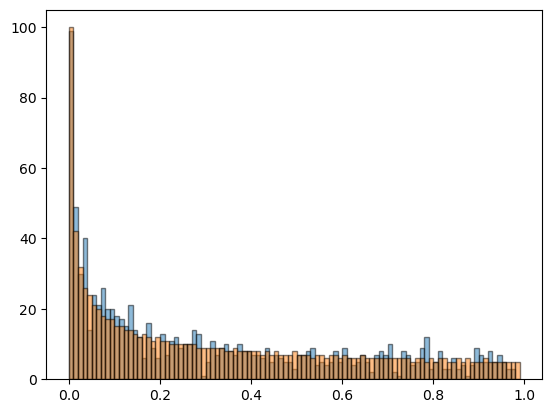

In [189]:
# 1, 2, 3
# sampled
# np.random.seed(0)
u_is = np.square(scipy.stats.uniform.rvs(size=1000))
plot.hist(u_is,density=False,edgecolor='black',alpha=.5,bins=np.arange(0,1,.01))

# analytic
# simplest way is to iterate 0-1 with a step of 1/1000 and then square the entire array 
# (this has a slight error as you get 0-.999 but it doesn't really affect the overall shape)
u_analytic = np.square(np.arange(0,1,.001))
plot.hist(u_analytic,density=False,edgecolor='black',alpha=.5,bins=np.arange(0,1,.01))

plot.show()

In [190]:
# sampled has noticeable variance from analytic since sample size is so small

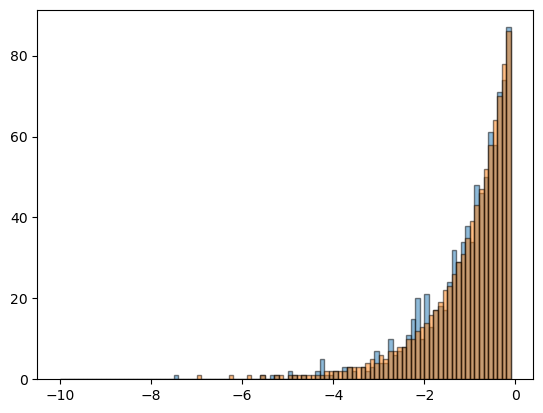

In [191]:
# 4 logx
u_is = np.log(scipy.stats.uniform.rvs(size=1000))
u_analytic = np.log(np.arange(0.001,1.001,.001))
plot.hist(u_is,density=False,edgecolor='black',alpha=.5,bins=np.arange(-10,0,.1))
plot.hist(u_analytic,density=False,edgecolor='black',alpha=.5,bins=np.arange(-10,0,.1))
plot.show()

In [192]:
# again sampled has noticeable variance from analytic since sample size is so small

In [193]:
# throwing two dice

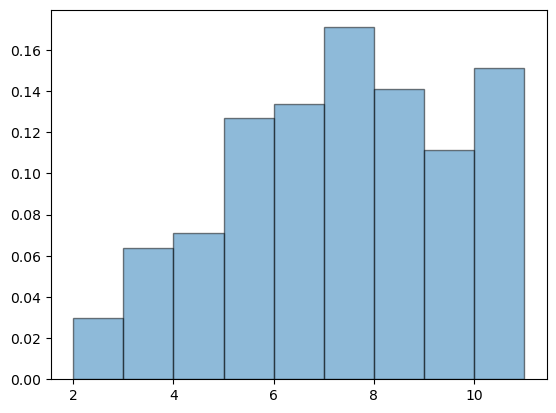

In [207]:
# 1, 2, 3
#scipy.stats.randint.rvs(1,6,size=10)
rolls1 = scipy.stats.uniform.rvs(size=1000)
rolls1 = np.ceil(rolls1*6)

rolls2 = scipy.stats.uniform.rvs(size=1000)
rolls2 = np.ceil(rolls2*6)

sum_rolls = rolls1+rolls2

plot.hist(sum_rolls,density=True,edgecolor='black',alpha=.5,bins=np.arange(2.0,12,1))
plot.show()

In [213]:
# 4
mean = np.mean(sum_rolls)
var = np.var(sum_rolls)
print(f'mean= {mean}, var= {var}')

mean= 7.013, var= 5.926831


In [223]:
# 5
count_7s = np.count_nonzero(sum_rolls == 7)
P_7s = count_7s/1000
print(f'P(7)= {P_7s}')
# todo: evaluate statistical uncertainty assuming binomial errors

P(7)= 0.166


In [221]:
# 6
# analytic probability of 7s is 1/6 (6 ways to get 7 / 36). this lines up nicely with our 1000 dice rolls

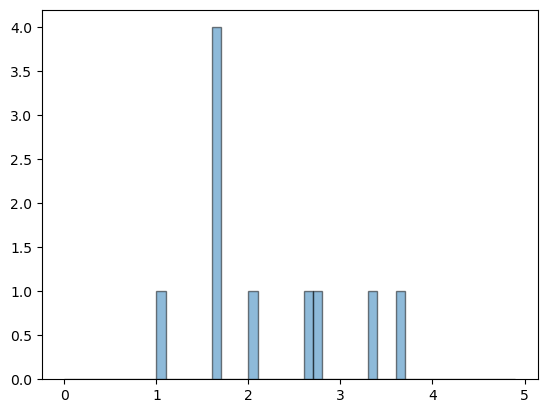

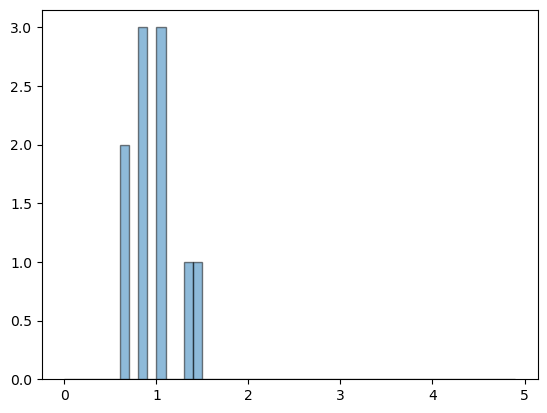

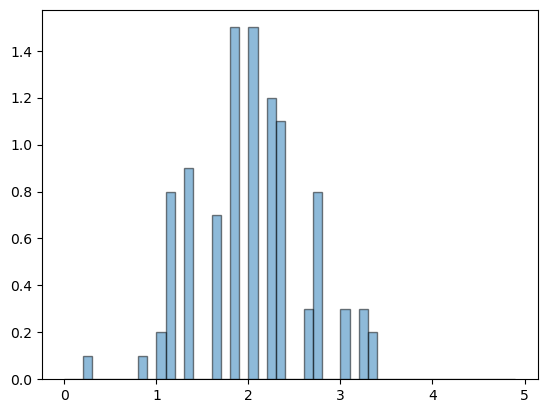

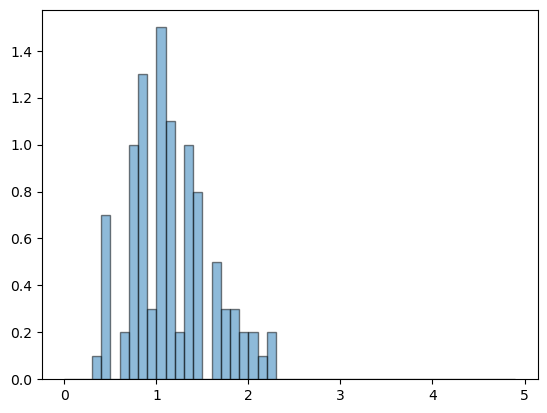

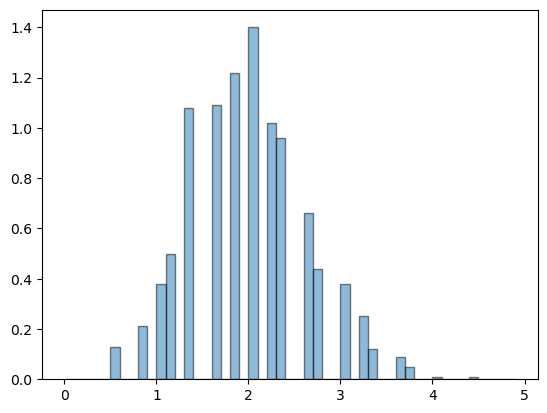

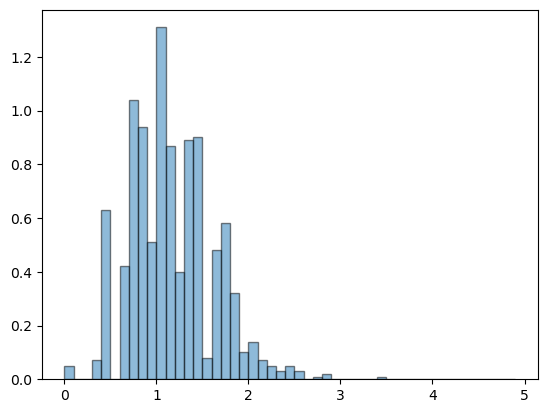

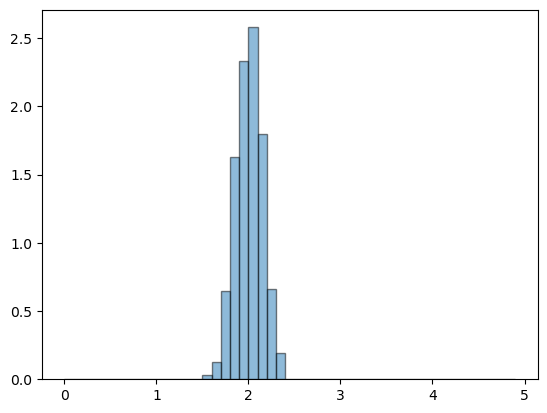

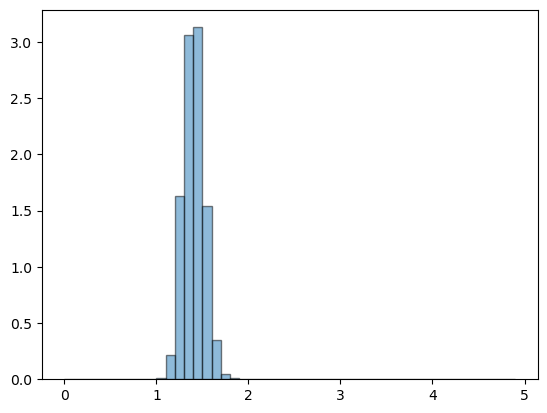

In [299]:
# central limit theorem
def Poisson_clt(N, M):
    mu_5s = np.zeros(N)
    std_5s = np.zeros(N)
    for i in range(N):
        sample = scipy.stats.poisson.rvs(2, size=M)
        mu_5s[i] = np.mean(sample)
        std_5s[i] = np.std(sample)
    
    plot.hist(mu_5s,density=True,edgecolor='black',alpha=.5,bins=np.arange(0,5,.1))
    plot.show()
    plot.hist(std_5s,density=True,edgecolor='black',alpha=.5,bins=np.arange(0,5,.1))
    plot.show()

Poisson_clt(10, 5)
Poisson_clt(100, 5)
Poisson_clt(1000, 5)

Poisson_clt(1000, 100)

array([1.2, 1.2, 1.6, 2. , 1.8, 2.2, 2.6, 1.8, 1.8, 1.8])